# Iron absorbance analysis

This notebook generates plots for OD340 absorbance for different concentrations of FeSO4 stocks.


## Inputs and outputs

#### Required file to run this notebook:
   - `IRON_DILUTION_SERIES_OD340.xlsx`


#### File generated by running this notebook:

Plots of absorbance values vs iron concentrations>
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl


### User parameters

In [2]:
user_params = {
    'iron_file': f'../data/IRON_DILUTION_SERIES_OD340.xlsx',
    'output_file_path': f'../data/', # Folder for output files,
    } 


In [3]:
df_iron = pd.read_excel(user_params['iron_file'], index_col=0)
df_iron

,60.000000,20.000000,6.666667,2.222222,0.740741,0.246914,0.082305,0.027435,0.009145,0.003048,0.001016,0.000000
mM,,,,,,,,,,,,
2+WEEK,0.8909,0.3785,0.2034,0.1486,0.1279,0.1209,0.1186,0.1180,0.1187,0.1174,0.1149,0.1128
2+WEEK,0.8689,0.3725,0.2036,0.1514,0.1337,0.1257,0.1229,0.1228,0.1224,0.1207,0.1169,0.1137
2+WEEK,0.8723,0.3677,0.2068,0.1486,0.1322,0.1258,0.1233,0.1224,0.1206,0.1209,0.1174,0.1149
1+WEEK,0.4747,0.2437,0.1688,0.1352,0.1437,0.1190,0.1188,0.1207,0.1211,0.1203,0.1177,0.1138
1+WEEK,0.5083,0.2352,0.1657,0.1342,0.1280,0.1191,0.1186,0.1213,0.1210,0.1210,0.1180,0.1138
1+WEEK,0.5077,0.2367,0.1679,0.1359,0.1319,0.1249,0.1239,0.1226,0.1218,0.1199,0.1180,0.1155
48 hours,0.3423,0.2031,0.1467,0.1328,0.1273,0.1256,0.1252,0.1259,0.1259,0.1235,0.1216,0.1188
48 hours,0.3484,0.2009,0.1486,0.1323,0.1272,0.1249,0.1243,0.1253,0.1246,0.1234,0.1210,0.1181
48 hours,0.3520,0.1897,0.1464,0.1295,0.1245,0.1221,0.1213,0.1212,0.1216,0.1214,0.1201,0.1173


In [4]:
concentrations = np.array(df_iron.columns)

Normalize by the mean of zero concentration value replicates:

In [5]:
zero_value = np.mean(df_iron.iloc[:, -1])
df_iron.iloc[:, -1] = zero_value
df_iron.loc[:, df_iron.columns] -= zero_value

In [6]:
df_iron

,60.000000,20.000000,6.666667,2.222222,0.740741,0.246914,0.082305,0.027435,0.009145,0.003048,0.001016,0.000000
mM,,,,,,,,,,,,
2+WEEK,0.775489,0.263089,0.087989,0.033189,0.012489,0.005489,0.003189,0.002589,0.003289,0.001989,-0.000511,0.0
2+WEEK,0.753489,0.257089,0.088189,0.035989,0.018289,0.010289,0.007489,0.007389,0.006989,0.005289,0.001489,0.0
2+WEEK,0.756889,0.252289,0.091389,0.033189,0.016789,0.010389,0.007889,0.006989,0.005189,0.005489,0.001989,0.0
1+WEEK,0.359289,0.128289,0.053389,0.019789,0.028289,0.003589,0.003389,0.005289,0.005689,0.004889,0.002289,0.0
1+WEEK,0.392889,0.119789,0.050289,0.018789,0.012589,0.003689,0.003189,0.005889,0.005589,0.005589,0.002589,0.0
1+WEEK,0.392289,0.121289,0.052489,0.020489,0.016489,0.009489,0.008489,0.007189,0.006389,0.004489,0.002589,0.0
48 hours,0.226889,0.087689,0.031289,0.017389,0.011889,0.010189,0.009789,0.010489,0.010489,0.008089,0.006189,0.0
48 hours,0.232989,0.085489,0.033189,0.016889,0.011789,0.009489,0.008889,0.009889,0.009189,0.007989,0.005589,0.0
48 hours,0.236589,0.074289,0.030989,0.014089,0.009089,0.006689,0.005889,0.005789,0.006189,0.005989,0.004689,0.0


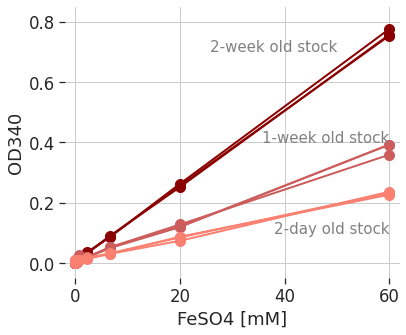

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 16
plt.style.use('seaborn-whitegrid') # seaborn-whitegrid, ggplot, fivethirtyeight
sns.set_context('notebook', font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine(left=True, bottom=True)
ax.plot(concentrations, df_iron.iloc[:3, :].T, color='darkred', 
        linewidth=2, marker='o', markersize=10)
ax.plot(concentrations, df_iron.iloc[3:6, :].T, color='indianred', 
        linewidth=2, marker='o', markersize=10)
ax.plot(concentrations, df_iron.iloc[6:, :].T, color='salmon', 
        linewidth=2, marker='o', markersize=10)
ax.set_xlim([-2, 62])
ax.set_ylim([-0.05, 0.85])
plt.text(50, 0.7, 
         f"2-week old stock", 
         horizontalalignment='right', 
         color='gray', 
         size='small'
        )
plt.text(60, 0.4, 
         f"1-week old stock", 
         horizontalalignment='right', 
         color='gray', 
         size='small'
        )
plt.text(60, 0.1, 
         f"2-day old stock", 
         horizontalalignment='right', 
         color='gray',
         size='small'
        )
ax.set(xlabel="FeSO4 [mM]", ylabel="OD340")

fig.savefig(
    f"{user_params['output_file_path']}/iron_absorbance.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

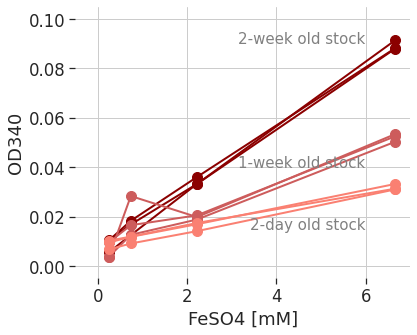

In [8]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 16
plt.style.use('seaborn-whitegrid') # seaborn-whitegrid, ggplot
sns.set_context('notebook', font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine(left=True, bottom=True)

ax.plot(concentrations[2:6], df_iron.iloc[:3, 2:6].T, color='darkred', linewidth=2, marker='o', markersize=10) # indianred, darkred
ax.plot(concentrations[2:6], df_iron.iloc[3:6, 2:6].T, color='indianred', linewidth=2, marker='o', markersize=10) # indianred, darkred
ax.plot(concentrations[2:6], df_iron.iloc[6:, 2:6].T, color='salmon', linewidth=2, marker='o', markersize=10)
    
ax.set_xlim([-0.5, 7])
ax.set_ylim([-0.005, 0.105])
ax.text(6, 0.09, 
         f"2-week old stock", 
         horizontalalignment='right', 
         color='gray', 
        size='small'
        )
ax.text(6, 0.04, 
         f"1-week old stock", 
         horizontalalignment='right', 
         color='gray', 
        size='small'
        )
ax.text(6, 0.015, 
         f"2-day old stock", 
         horizontalalignment='right', 
         color='gray', 
        size='small'
        )
ax.set(xlabel="FeSO4 [mM]", ylabel="OD340")

fig.savefig(
    f"{user_params['output_file_path']}/iron_absorbance_zoom.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)